In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf7a33ed04b474ee0d19ed1cace7bd5c


In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | vostok
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | kavaratti
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | kavieng
Processing Record 8 of Set 1 | parras
City not found. Skipping...
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | yemelyanovo
Processing Record 12 of Set 1 | panagjuriste
City not found. Skipping...
Processing Record 13 of Set 1 | belmonte
Processing Record 14 of Set 1 | cockburn town
Processing Record 15 of Set 1 | kahului
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | 

Processing Record 37 of Set 4 | bukoba
Processing Record 38 of Set 4 | tahe
Processing Record 39 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 40 of Set 4 | aljezur
Processing Record 41 of Set 4 | mayo
Processing Record 42 of Set 4 | nuuk
Processing Record 43 of Set 4 | khatanga
Processing Record 44 of Set 4 | barcelona
Processing Record 45 of Set 4 | groningen
Processing Record 46 of Set 4 | artyk
City not found. Skipping...
Processing Record 47 of Set 4 | pital
Processing Record 48 of Set 4 | lamu
Processing Record 49 of Set 4 | anadyr
Processing Record 50 of Set 4 | balkhash
Processing Record 1 of Set 5 | angoche
Processing Record 2 of Set 5 | monrovia
Processing Record 3 of Set 5 | haverfordwest
Processing Record 4 of Set 5 | kikwit
Processing Record 5 of Set 5 | lolua
City not found. Skipping...
Processing Record 6 of Set 5 | mount isa
Processing Record 7 of Set 5 | maceio
Processing Record 8 of Set 5 | shatsk
Processing Record 9 of Set 5 | huarmey
Processing R

Processing Record 26 of Set 8 | avera
Processing Record 27 of Set 8 | quatre cocos
Processing Record 28 of Set 8 | naftah
City not found. Skipping...
Processing Record 29 of Set 8 | ayorou
Processing Record 30 of Set 8 | wagar
Processing Record 31 of Set 8 | salalah
Processing Record 32 of Set 8 | paamiut
Processing Record 33 of Set 8 | itarantim
Processing Record 34 of Set 8 | grand-lahou
Processing Record 35 of Set 8 | adrar
Processing Record 36 of Set 8 | lagos
Processing Record 37 of Set 8 | jaguaquara
Processing Record 38 of Set 8 | urumqi
Processing Record 39 of Set 8 | port augusta
Processing Record 40 of Set 8 | eureka
Processing Record 41 of Set 8 | cucaita
Processing Record 42 of Set 8 | chapais
Processing Record 43 of Set 8 | sardarshahr
Processing Record 44 of Set 8 | abu dhabi
Processing Record 45 of Set 8 | ketchikan
Processing Record 46 of Set 8 | maniitsoq
Processing Record 47 of Set 8 | kharovsk
Processing Record 48 of Set 8 | durgapur
Processing Record 49 of Set 8 | f

Processing Record 17 of Set 12 | bekhtery
Processing Record 18 of Set 12 | saint combs
City not found. Skipping...
Processing Record 19 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 20 of Set 12 | kaohsiung
Processing Record 21 of Set 12 | acapulco
Processing Record 22 of Set 12 | faanui
Processing Record 23 of Set 12 | bullhead city
Processing Record 24 of Set 12 | kununurra
Processing Record 25 of Set 12 | dargaville
Processing Record 26 of Set 12 | presidencia roque saenz pena
Processing Record 27 of Set 12 | abay
Processing Record 28 of Set 12 | zaysan
Processing Record 29 of Set 12 | neuquen
Processing Record 30 of Set 12 | navoi
Processing Record 31 of Set 12 | verkhnyaya inta
Processing Record 32 of Set 12 | pisco
Processing Record 33 of Set 12 | vallenar
Processing Record 34 of Set 12 | san luis de palenque
Processing Record 35 of Set 12 | monterey
Processing Record 36 of Set 12 | marsh harbour
Processing Record 37 of Set 12 | kembolcha
Proces

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,33.33,92,36,9.15,RU,2021-05-30 20:03:09
1,Vostok,46.4856,135.8833,42.28,90,100,2.73,RU,2021-05-30 20:03:10
2,Kodiak,57.7900,-152.4072,47.71,93,90,5.75,US,2021-05-30 20:02:29
3,Kavaratti,10.5669,72.6420,82.87,76,80,17.07,IN,2021-05-30 20:03:10
4,Atuona,-9.8000,-139.0333,79.61,63,3,8.12,PF,2021-05-30 20:02:44
5,Qaanaaq,77.4840,-69.3632,32.49,92,100,5.12,GL,2021-05-30 20:03:11
6,Kavieng,-2.5744,150.7967,80.76,81,100,9.53,PG,2021-05-30 20:02:49
7,Albany,42.6001,-73.9662,49.08,92,100,6.33,US,2021-05-30 20:00:45
8,Bredasdorp,-34.5322,20.0403,52.05,81,64,2.64,ZA,2021-05-30 20:03:12
9,Yemelyanovo,56.1681,92.6767,32.81,86,0,1.59,RU,2021-05-30 20:03:12


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2021-05-30 20:03:09,71.6872,128.8694,33.33,92,36,9.15
1,Vostok,RU,2021-05-30 20:03:10,46.4856,135.8833,42.28,90,100,2.73
2,Kodiak,US,2021-05-30 20:02:29,57.7900,-152.4072,47.71,93,90,5.75
3,Kavaratti,IN,2021-05-30 20:03:10,10.5669,72.6420,82.87,76,80,17.07
4,Atuona,PF,2021-05-30 20:02:44,-9.8000,-139.0333,79.61,63,3,8.12
5,Qaanaaq,GL,2021-05-30 20:03:11,77.4840,-69.3632,32.49,92,100,5.12
6,Kavieng,PG,2021-05-30 20:02:49,-2.5744,150.7967,80.76,81,100,9.53
7,Albany,US,2021-05-30 20:00:45,42.6001,-73.9662,49.08,92,100,6.33
8,Bredasdorp,ZA,2021-05-30 20:03:12,-34.5322,20.0403,52.05,81,64,2.64
9,Yemelyanovo,RU,2021-05-30 20:03:12,56.1681,92.6767,32.81,86,0,1.59


In [28]:
# Create the output file (CSV).
output_data_file = "./weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [30]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1622411529.6018026

In [31]:
# Get today's date.
today = time.strftime("%x")
today

'05/30/21'

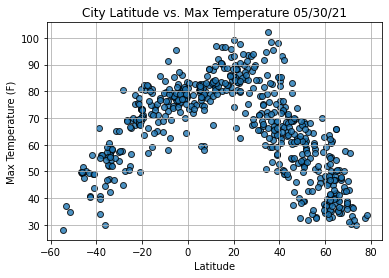

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

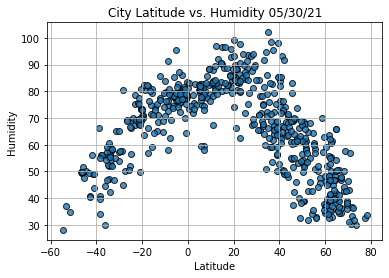

In [33]:

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

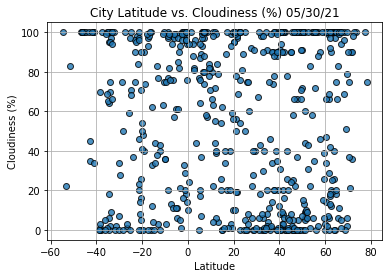

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

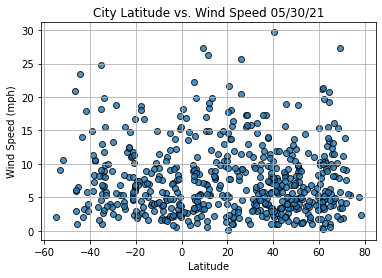

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()